In [54]:
import pandas as pd

colunas = ['PROCESSO', 'EMENTA', 'ROTULO_MANUAL']

df = pd.read_csv('../data/ementas_rotulos_manual.csv', header=0, sep=',', quotechar='"', usecols=colunas)

In [55]:
df.head()

,PROCESSO,EMENTA,ROTULO_MANUAL
0,00024255420138240081,<br> APELAÇÃO CÍVEL. AÇÃO DE INDENIZAÇÃO POR...,DAN
1,00103872520108240020,<br> APELAÇÃO CÍVEL. AÇÃO DE RESCISÃO CONTRA...,CON
2,00103872520108240020,<br> EMBARGOS DE DECLARAÇÃO EM APELAÇÃO CÍVE...,CON
3,00067390720078240064,<br> EMBARGOS DE DECLARAÇÃO EM APELAÇÃO CÍVE...,PRE
4,00067390720078240064,<br> EMBARGOS DE DECLARAÇÃO EM APELAÇÃO CÍVE...,PRE


In [56]:
def tratar_texto(texto):
    texto = texto.lower()
    texto = texto.replace('<br>', '')
    return texto

In [57]:
import string

remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def remover_pontuacao(texto):
    return texto.translate(remove_punctuation_map)

In [75]:
from stop_words import get_stop_words

stop_words_pt = get_stop_words("pt")

stop_words_pt = set(get_stop_words('pt'))
stop_words_novas = {'oa', 'lei', 'n', 'i', 'art', 'artigo'}
stop_words_pt = stop_words_pt.union(stop_words_novas)

def remover_stop_words(words):
    words = [word for word in words if word != '' and word not in stop_words_pt]
    words = [word for word in words if not re.match(r'^(\w)\1+$', word) and len(word) > 1]
    return words

In [59]:
import re
from nltk import tokenize
from unidecode import unidecode

def normalizar(texto):
    texto = tratar_texto(texto)
    texto = remover_pontuacao(texto)
    # removendo acentos
    texto = unidecode(texto)
    #removendo números
    texto = re.sub('[^a-zA-Z ]+', '', texto)
        
    # quebra em palavras
    words = tokenize.casual.casual_tokenize(texto)
    words = remover_stop_words(words);
       
    return words

In [60]:
df['EMENTA'][5]

'<br>   AGRAVO DE INSTRUMENTO. AÇÃO DE RESPONSABILIDADE OBRIGACIONAL SECURITÁRIA. SISTEMA FINANCEIRO DA HABITAÇÃO. DECISÃO QUE DETERMINA A PERMANÊNCIA DOS AUTOS NA JUSTIÇA COMUM ESTADUAL. MANIFESTAÇÃO DE INTERESSE DA CAIXA ECONÔMICA FEDERAL. EXEGESE DA DECISÃO DO SUPERIOR TRIBUNAL DE JUSTIÇA EM RECURSO REPRESENTATIVO DA CONTROVÉRSIA (EMB. DECL. EM EMB. DECL. NO RESP. N. 1.091.393/SC). PREVISÃO NA LEI 12.409/2011, COM REDAÇÃO DA LEI N. 13.000/2014. INTELIGÊNCIA DA SÚMULA 150 DO STJ. COMPETÊNCIA DA JUSTIÇA FEDERAL PARA APRECIAR O PEDIDO DE INGRESSO NA LIDE REALIZADO PELA CEF. RECURSO PROVIDO.<br>   No julgamento dos Embargos de Declaração em Embargos de Declaração no Recurso Especial n. 1.091.393/SC, submetido ao procedimento de recurso representativo de controvérsia, o Superior Tribunal de Justiça firmou o entendimento de que a Caixa Econômica Federal poderá ingressar na lide que tenha por objeto o seguro habitacional, desde que comprove: (a) a pactuação do contrato de mútuo habitaciona

In [76]:
' '.join(normalizar(df['EMENTA'][5]))

'agravo instrumento acao responsabilidade obrigacional securitaria sistema financeiro habitacao decisao determina permanencia autos justica comum estadual manifestacao interesse caixa economica federal exegese decisao superior tribunal justica recurso representativo controversia emb decl emb decl resp sc previsao redacao inteligencia sumula stj competencia justica federal apreciar pedido ingresso lide realizado cef recurso provido julgamento embargos declaracao embargos declaracao recurso especial sc submetido procedimento recurso representativo controversia superior tribunal justica firmou entendimento caixa economica federal podera ingressar lide objeto seguro habitacional desde comprove pactuacao contrato mutuo habitacional existencia apolice publica vinculada ramo comprometimento fundo compensacao valores salariais fcvs efetivo risco fundo equalizacao sinistralidade apolice fesa analise preenchimento pressupostos citados compete justica federal forca sumula superior tribunal justic

É possível verificar nesse exemplo que as palavras mais utilizadas se referem ao "Superior Tribunal de Justiça" e "Justiça Federal", o que não colabora para a identificação do tema abordado.

In [77]:
from nltk.probability import FreqDist

words = normalizar(df['EMENTA'][5])
fdist = FreqDist(words)

fdist

FreqDist({'justica': 8, 'federal': 7, 'superior': 4, 'tribunal': 4, 'recurso': 4, 'caixa': 3, 'economica': 3, 'sumula': 3, 'lide': 3, 'decisao': 2, ...})

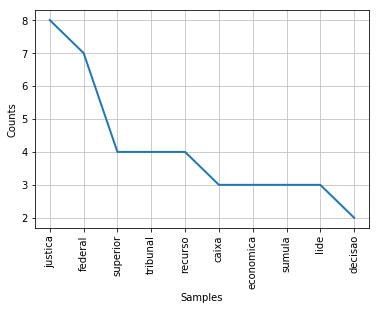

In [80]:
p = fdist.plot(10,cumulative=False)

p

In [83]:
df['EMENTA_NORM'] = df['EMENTA'].apply(lambda e: ' '.join(normalizar(e)))

In [84]:
df.to_csv('../data/ementas_pre-processadas.csv')